# MOGDx Free

This architecture generate patient similairty networks directly from the embeddings. 

Each model undergoes pretraining to generate reasonable embeddings. Distance is measured between patients in the embedding space and the model weights are reset. MOGDx is then trained as normal.

In [6]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0 , './../')
from MAIN.utils import *
from MAIN.train import *
import MAIN.preprocess_functions
from MAIN.GNN_MME import GCN_MME , GSage_MME , GAT_MME

import torch
import torch.nn.functional as F
import dgl
from dgl.dataloading import MultiLayerFullNeighborSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import networkx as nx
from datetime import datetime
import joblib
import warnings
import gc
import copy

warnings.filterwarnings("ignore")

print("Finished Library Import \n")

Finished Library Import 



In [7]:
data_input = './../../data/TCGA/BRCA/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'index'
target = 'paper_BRCA_Subtype_PAM50'

Using cuda device
Total = 42.4Gb 	 Reserved = 0.8Gb 	 Allocated = 0.3Gb
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, a

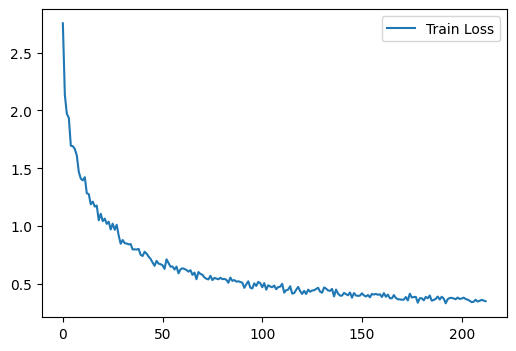

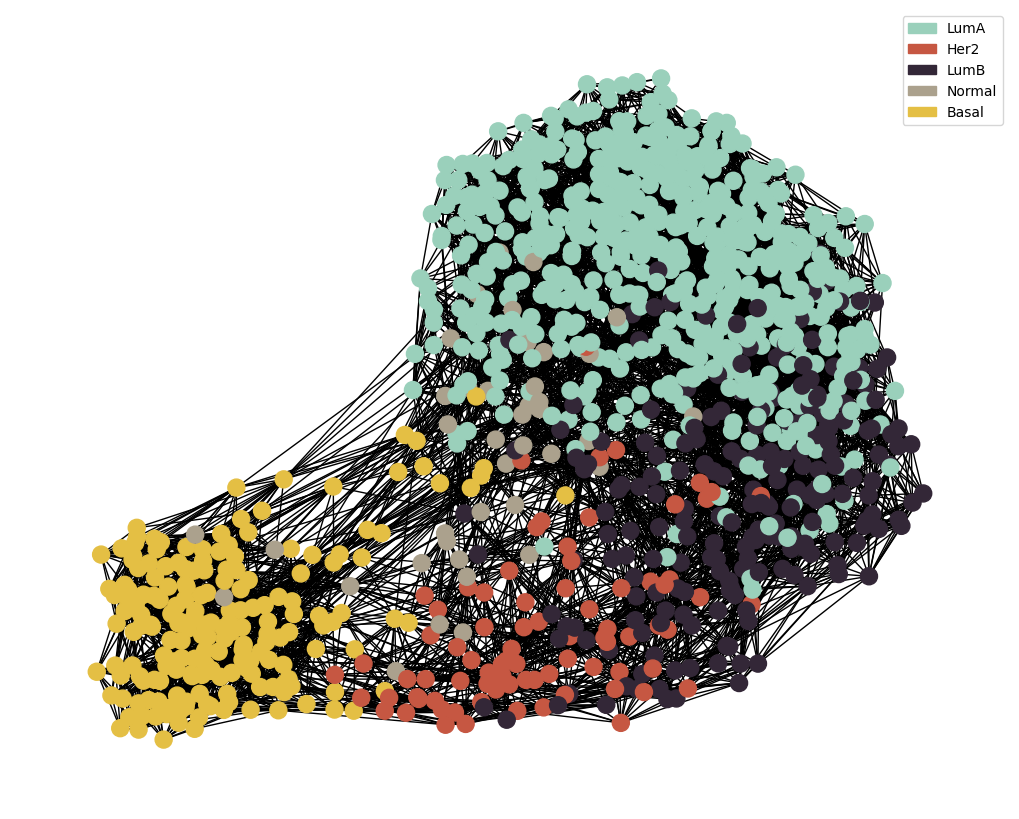

Pretraining | Loss = 0.4295 | Accuracy = 0.8472 
Graph(num_nodes=1076, num_edges=18070,
      ndata_schemes={'idx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(5,), dtype=torch.int64), 'feat': Scheme(shape=(30459,), dtype=torch.float32)}
      edata_schemes={})
Epoch 00000 | Loss 1.6894 | Train Acc. 0.2360 | 
Epoch 00005 | Loss 0.6380 | Train Acc. 0.8151 | 
Epoch 00010 | Loss 0.5482 | Train Acc. 0.8360 | 
Epoch 00015 | Loss 0.5048 | Train Acc. 0.8395 | 
Epoch 00020 | Loss 0.4710 | Train Acc. 0.8477 | 
Epoch 00025 | Loss 0.4344 | Train Acc. 0.8558 | 
Epoch 00030 | Loss 0.4149 | Train Acc. 0.8686 | 
Epoch 00035 | Loss 0.4022 | Train Acc. 0.8674 | 
Epoch 00040 | Loss 0.3994 | Train Acc. 0.8698 | 
Epoch 00045 | Loss 0.3920 | Train Acc. 0.8593 | 
Epoch 00050 | Loss 0.3821 | Train Acc. 0.8686 | 
Epoch 00055 | Loss 0.3768 | Train Acc. 0.8721 | 
Epoch 00060 | Loss 0.3771 | Train Acc. 0.8686 | 
Epoch 00065 | Loss 0.3691 | Train Acc. 0.8709 | 
Epoch 00070 | Loss 0.3616 | Train Ac

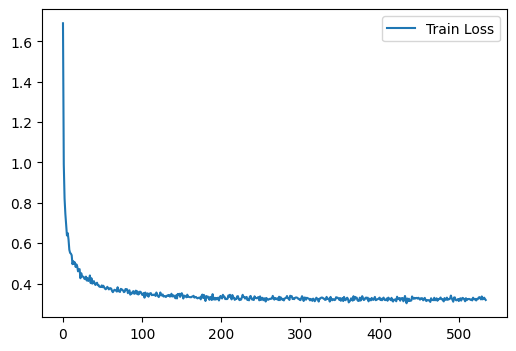

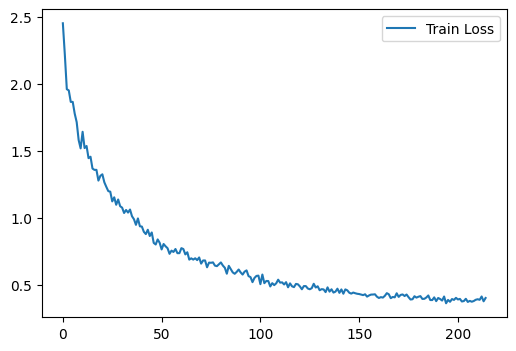

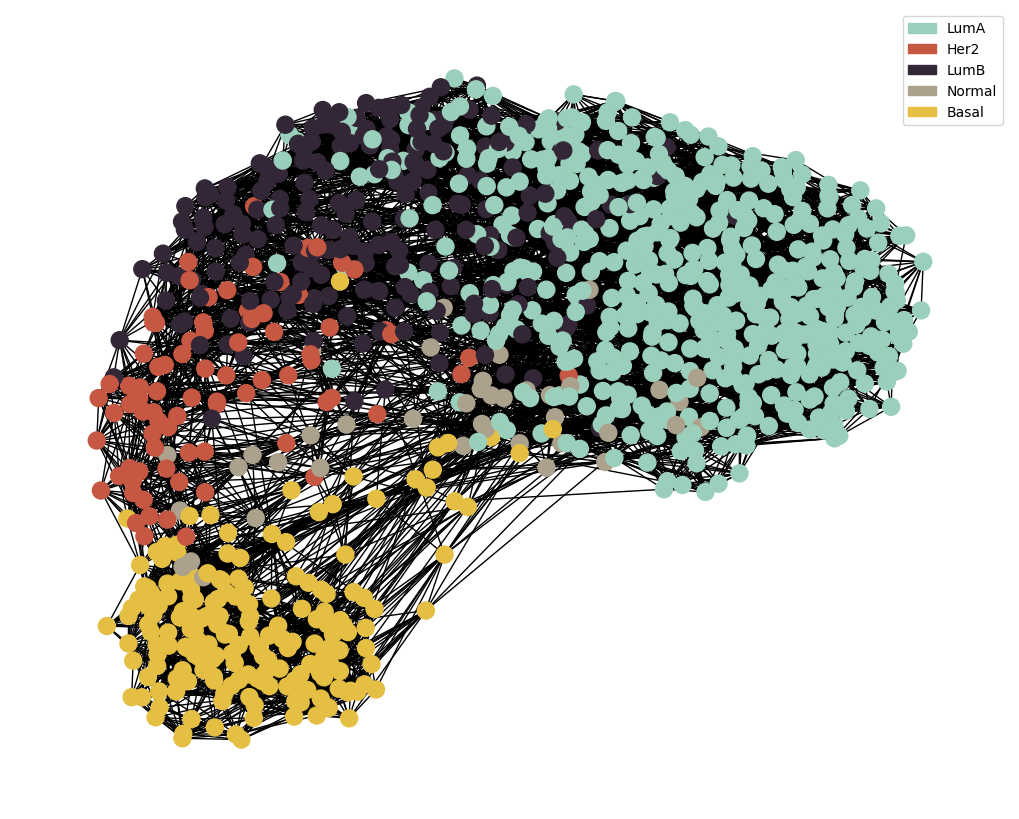

Pretraining | Loss = 0.5478 | Accuracy = 0.8419 
Graph(num_nodes=1076, num_edges=18178,
      ndata_schemes={'idx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(5,), dtype=torch.int64), 'feat': Scheme(shape=(30459,), dtype=torch.float32)}
      edata_schemes={})
Epoch 00000 | Loss 2.0441 | Train Acc. 0.1150 | 
Epoch 00005 | Loss 0.6583 | Train Acc. 0.8014 | 
Epoch 00010 | Loss 0.5490 | Train Acc. 0.8304 | 
Epoch 00015 | Loss 0.4682 | Train Acc. 0.8479 | 
Epoch 00020 | Loss 0.4292 | Train Acc. 0.8641 | 
Epoch 00025 | Loss 0.4143 | Train Acc. 0.8699 | 
Epoch 00030 | Loss 0.3907 | Train Acc. 0.8722 | 
Epoch 00035 | Loss 0.3699 | Train Acc. 0.8734 | 
Epoch 00040 | Loss 0.3548 | Train Acc. 0.8827 | 
Epoch 00045 | Loss 0.3561 | Train Acc. 0.8839 | 
Epoch 00050 | Loss 0.3422 | Train Acc. 0.8792 | 
Epoch 00055 | Loss 0.3370 | Train Acc. 0.8862 | 
Epoch 00060 | Loss 0.3369 | Train Acc. 0.8815 | 
Epoch 00065 | Loss 0.3422 | Train Acc. 0.8943 | 
Epoch 00070 | Loss 0.3417 | Train Ac

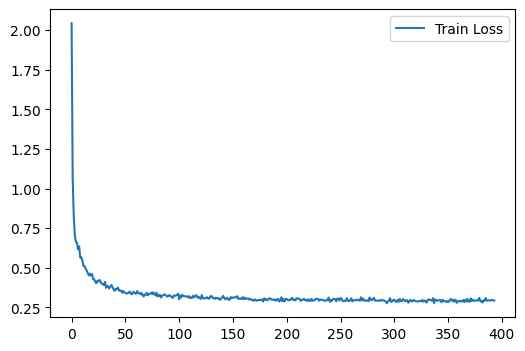

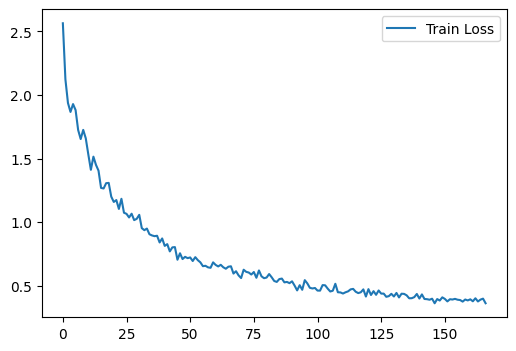

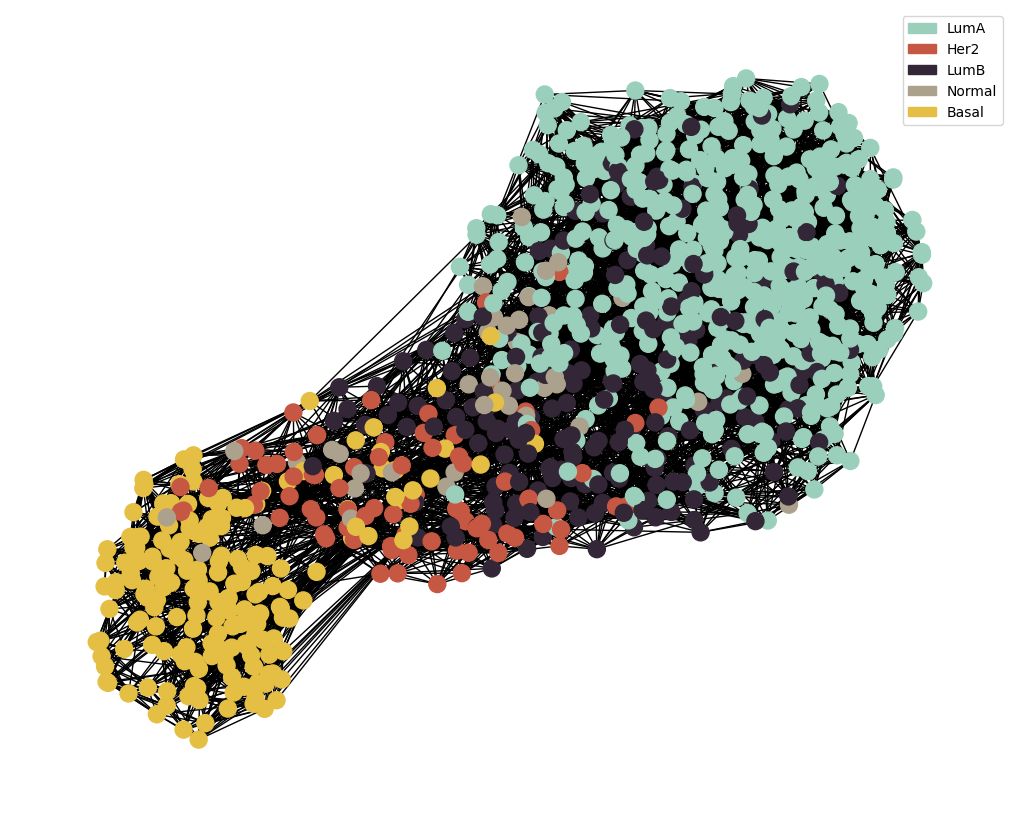

Pretraining | Loss = 0.6176 | Accuracy = 0.8047 
Graph(num_nodes=1076, num_edges=18230,
      ndata_schemes={'idx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(5,), dtype=torch.int64), 'feat': Scheme(shape=(30459,), dtype=torch.float32)}
      edata_schemes={})
Epoch 00000 | Loss 1.6864 | Train Acc. 0.2741 | 
Epoch 00005 | Loss 0.6581 | Train Acc. 0.7921 | 
Epoch 00010 | Loss 0.5399 | Train Acc. 0.8455 | 
Epoch 00015 | Loss 0.4712 | Train Acc. 0.8571 | 
Epoch 00020 | Loss 0.4702 | Train Acc. 0.8502 | 
Epoch 00025 | Loss 0.4411 | Train Acc. 0.8455 | 
Epoch 00030 | Loss 0.4082 | Train Acc. 0.8630 | 
Epoch 00035 | Loss 0.3969 | Train Acc. 0.8653 | 
Epoch 00040 | Loss 0.3749 | Train Acc. 0.8688 | 
Epoch 00045 | Loss 0.3886 | Train Acc. 0.8525 | 
Epoch 00050 | Loss 0.3660 | Train Acc. 0.8711 | 
Epoch 00055 | Loss 0.3625 | Train Acc. 0.8653 | 
Epoch 00060 | Loss 0.3531 | Train Acc. 0.8757 | 
Epoch 00065 | Loss 0.3609 | Train Acc. 0.8734 | 
Epoch 00070 | Loss 0.3577 | Train Ac

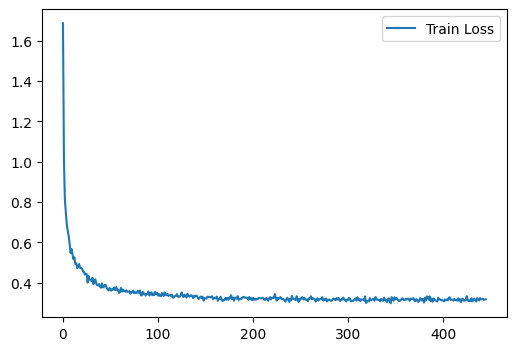

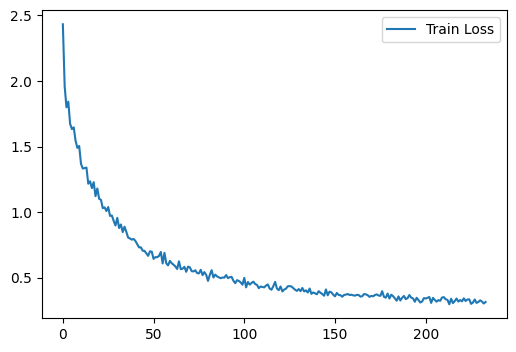

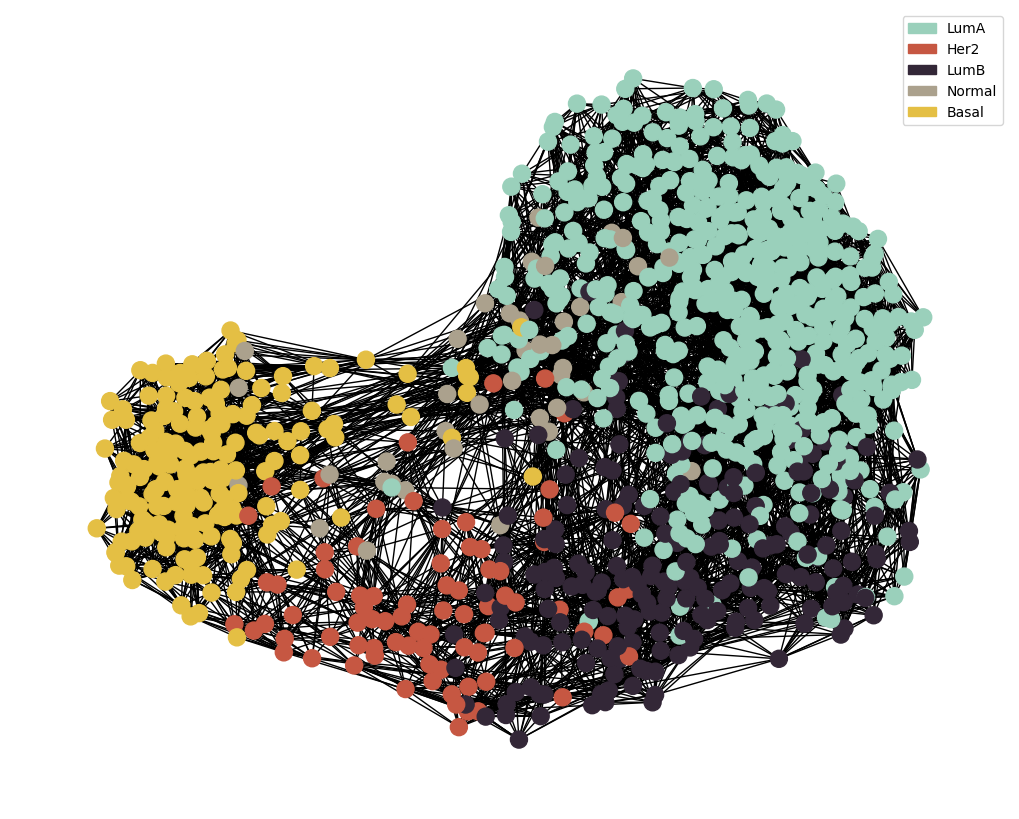

Pretraining | Loss = 0.5246 | Accuracy = 0.8465 
Graph(num_nodes=1076, num_edges=18106,
      ndata_schemes={'idx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(5,), dtype=torch.int64), 'feat': Scheme(shape=(30459,), dtype=torch.float32)}
      edata_schemes={})
Epoch 00000 | Loss 2.0896 | Train Acc. 0.1638 | 
Epoch 00005 | Loss 0.7488 | Train Acc. 0.7735 | 
Epoch 00010 | Loss 0.6079 | Train Acc. 0.8177 | 
Epoch 00015 | Loss 0.5355 | Train Acc. 0.8351 | 
Epoch 00020 | Loss 0.4685 | Train Acc. 0.8525 | 
Epoch 00025 | Loss 0.4448 | Train Acc. 0.8653 | 
Epoch 00030 | Loss 0.4276 | Train Acc. 0.8502 | 
Epoch 00035 | Loss 0.4055 | Train Acc. 0.8571 | 
Epoch 00040 | Loss 0.3865 | Train Acc. 0.8711 | 
Epoch 00045 | Loss 0.3677 | Train Acc. 0.8780 | 
Epoch 00050 | Loss 0.3576 | Train Acc. 0.8780 | 
Epoch 00055 | Loss 0.3685 | Train Acc. 0.8699 | 
Epoch 00060 | Loss 0.3516 | Train Acc. 0.8688 | 
Epoch 00065 | Loss 0.3483 | Train Acc. 0.8827 | 
Epoch 00070 | Loss 0.3499 | Train Ac

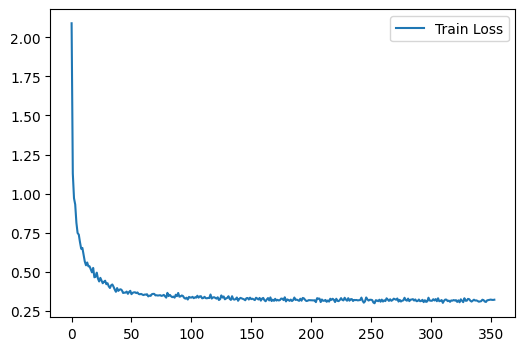

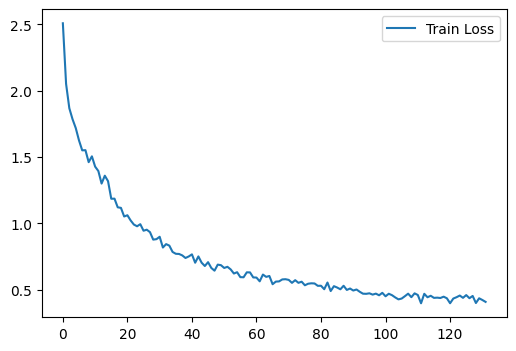

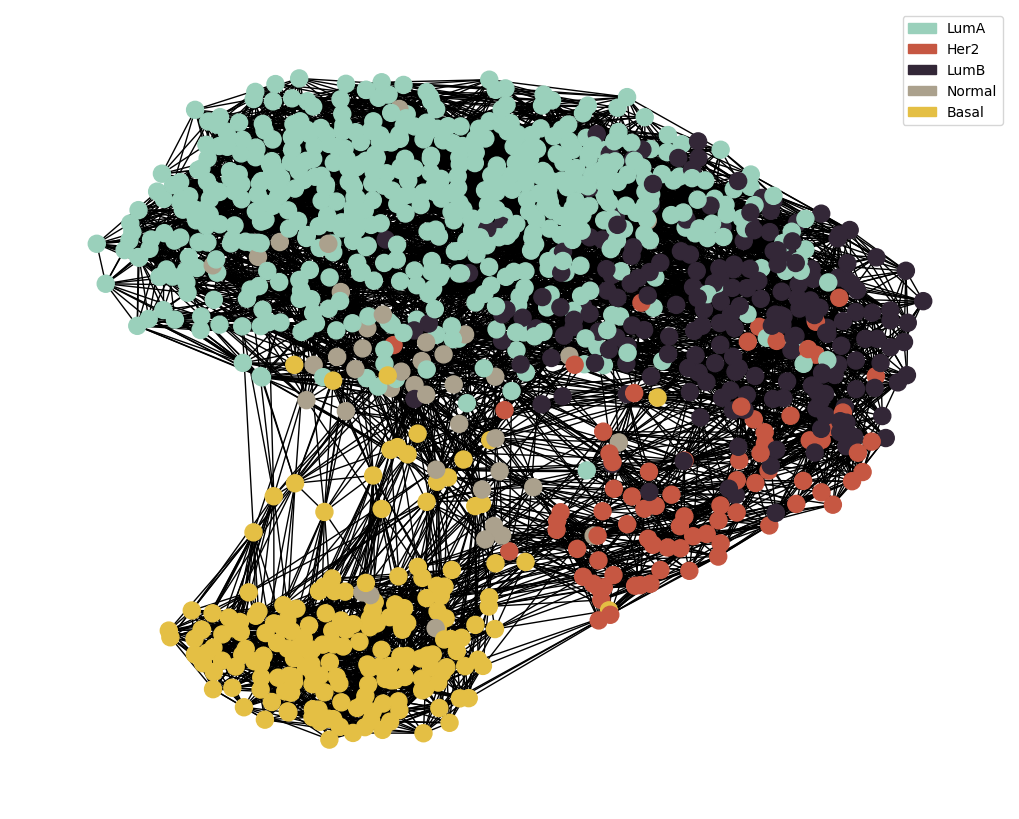

Pretraining | Loss = 0.6088 | Accuracy = 0.7814 
Graph(num_nodes=1076, num_edges=18188,
      ndata_schemes={'idx': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(5,), dtype=torch.int64), 'feat': Scheme(shape=(30459,), dtype=torch.float32)}
      edata_schemes={})
Epoch 00000 | Loss 2.3680 | Train Acc. 0.0418 | 
Epoch 00005 | Loss 0.6399 | Train Acc. 0.8118 | 
Epoch 00010 | Loss 0.5215 | Train Acc. 0.8328 | 
Epoch 00015 | Loss 0.4666 | Train Acc. 0.8571 | 
Epoch 00020 | Loss 0.4282 | Train Acc. 0.8688 | 
Epoch 00025 | Loss 0.4414 | Train Acc. 0.8560 | 
Epoch 00030 | Loss 0.4203 | Train Acc. 0.8630 | 
Epoch 00035 | Loss 0.3844 | Train Acc. 0.8757 | 
Epoch 00040 | Loss 0.3720 | Train Acc. 0.8711 | 
Epoch 00045 | Loss 0.3658 | Train Acc. 0.8699 | 
Epoch 00050 | Loss 0.3577 | Train Acc. 0.8792 | 
Epoch 00055 | Loss 0.3498 | Train Acc. 0.8920 | 
Epoch 00060 | Loss 0.3519 | Train Acc. 0.8699 | 
Epoch 00065 | Loss 0.3438 | Train Acc. 0.8827 | 
Epoch 00070 | Loss 0.3490 | Train Ac

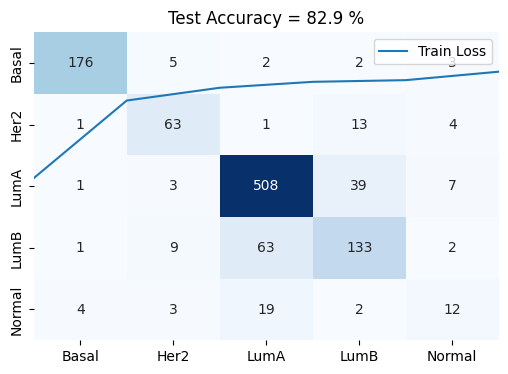

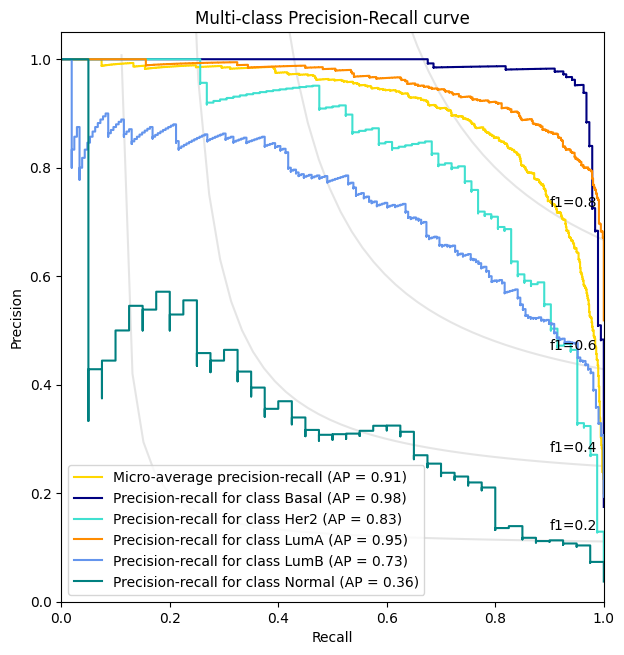

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()

datModalities , meta = data_parsing(data_input , ['RPPA', 'mRNA'] , target , index_col)

graph_file = data_input + '../Networks/' + snf_net
g = nx.read_graphml(graph_file)

meta = meta.loc[sorted(meta.index)]
label = F.one_hot(torch.Tensor(list(meta.astype('category').cat.codes)).to(torch.int64))

skf = StratifiedKFold(n_splits=5 , shuffle=True) 

print(skf)

MME_input_shapes = [datModalities[mod].shape[1] for mod in datModalities]

h = reduce(merge_dfs , list(datModalities.values()))
h = h.loc[sorted(h.index)]

del datModalities
gc.collect()

output_metrics = []
test_logits = []
test_labels = []

for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :
    
    model = GCN_MME(MME_input_shapes , [16 , 16] , 64 , [32]  , len(meta.unique())).to(device)
    g = dgl.graph(([], []) , num_nodes=len(meta))
    g = dgl.add_self_loop(g)
    g.ndata['feat'] = torch.Tensor(h.to_numpy())
    g.ndata['label'] = label
    g = g.to(device)
    
    print(model)
    print(g)

    G = train(g, train_index, device ,  model , meta , 500 , 1e-3 , 20, pretrain=True)
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)
    
    print(
        "Pretraining | Loss = {:.4f} | Accuracy = {:.4f} ".format(
         test_output_metrics[0] , test_output_metrics[1] )
    )
    
    with torch.no_grad():
        torch.cuda.empty_cache()
    gc.collect()

    model = model.apply(init_weights)

    g = dgl.from_networkx(G , node_attrs=['idx' , 'label'])
    g.ndata['feat'] = torch.Tensor(h.to_numpy())
    g.ndata['label'] = label
    g = g.to(device)
    
    print(g)
    
    loss_plot = train(g, train_index, device ,  model , meta , 2000 , 1e-3 , 100)
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)

accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
node_true        = []
display_label = meta.astype('category').cat.categories
for pred , true in zip(all_predictions_conf.argmax(1) , list(test_labels.detach().cpu().argmax(1).numpy()))  : 
    node_predictions.append(display_label[pred])
    node_true.append(display_label[true])

tst = pd.DataFrame({'Actual' : node_true , 'Predicted' : node_predictions})